### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

512 px cropped by Optic Disc area and resized to 128 px images were used.

You can either train your model or upload a pre-trained one from:
*../models_weights/02.03,13:57,OD Cup, U-Net light on DRISHTI-GS 512 px cropped to OD 128 px fold 0, SGD, log_dice loss/last_checkpoint.hdf5*

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import pandas as pd
from model import *

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.2.4-tf
TensorFlow version: 1.14.0


In [4]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

In [5]:
model = get_unet_light(img_rows=128, img_cols=128)
model.compile(optimizer=SGD(learning_rate=1e-4, momentum=0.95),
              loss=log_dice_loss,
              metrics=[mean_IOU_gpu, dice_metric])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [6]:
# Loading full images of desired resolution:
img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

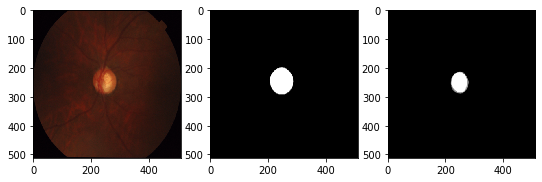

(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [7]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(np.squeeze(img_train[0]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 3, 2)
ax.imshow(np.squeeze(disc_train[0]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 3, 3)
ax.imshow(np.squeeze(cup_train[0]), cmap=plt.cm.Greys_r)
plt.show()

img_train, cup_train, disc_train, disc_locations

#### Generator of augmented data:

Testing the data generator and generator for augmented data:

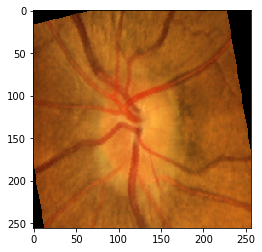

In [14]:
gen = data_generator(img_train, cup_train, disc_locations, 256, 'train', batch_size=1)
batch = next(gen)
#plt.imshow(batch[0][0])

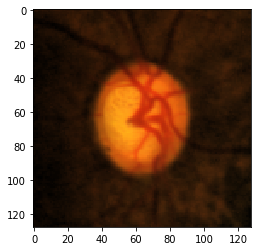

(51, 51)

In [18]:
X_valid, Y_valid = next(data_generator(img_test, cup_test, disc_locations_test, train_or_test='test', batch_size=100, stationary=True))
len(X_valid), len(Y_valid)

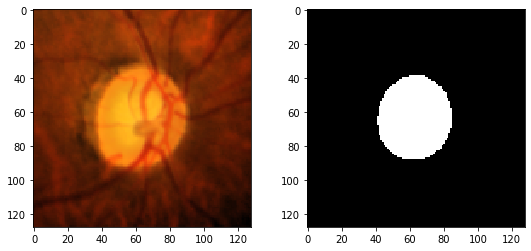

In [19]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_valid[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_valid[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and testing cup

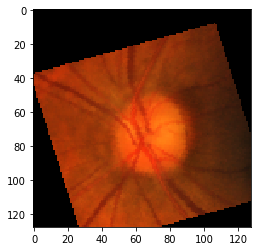

1/5 [=====>........................] - ETA: 3s - loss: 2.0835 - mean_IOU_gpu: 0.0979 - dice_metric: 0.1783

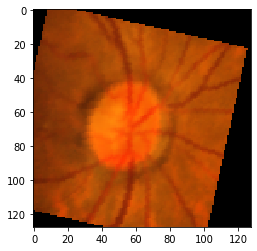

2/5 [===========>..................] - ETA: 2s - loss: 1.8229 - mean_IOU_gpu: 0.0971 - dice_metric: 0.1771

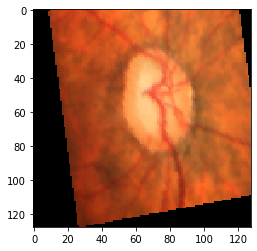

3/5 [=================>............] - ETA: 1s - loss: 1.7130 - mean_IOU_gpu: 0.1097 - dice_metric: 0.1973

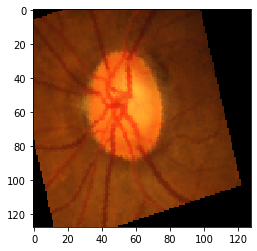

4/5 [=======================>......] - ETA: 0s - loss: 1.6187 - mean_IOU_gpu: 0.1280 - dice_metric: 0.2253

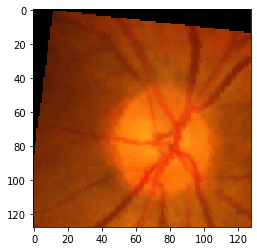

5/5 [==============================] - 3s 629ms/step - loss: 1.6302 - mean_IOU_gpu: 0.1219 - dice_metric: 0.2158


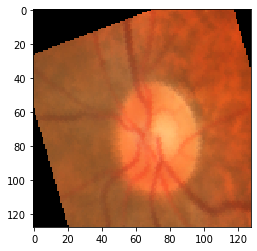

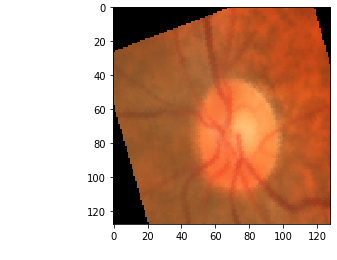

In [20]:
train(img_train, cup_train, disc_locations, 'cup_color', model, 700)

### Visual check

image #0


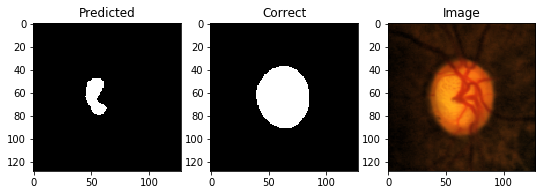

IOU: 0.19094184041023254
Dice: 0.320656871218669
image #1


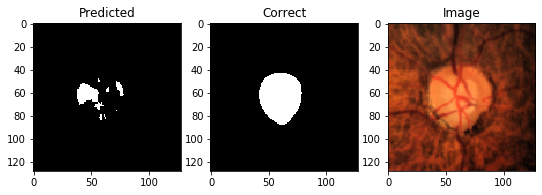

IOU: 0.20978502929210663
Dice: 0.34681372549019607
image #2


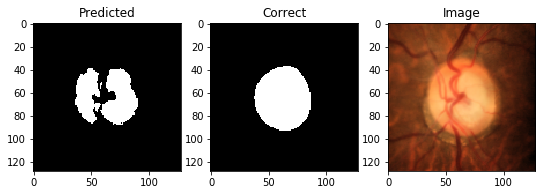

IOU: 0.6523221135139465
Dice: 0.7895822588963384
image #3


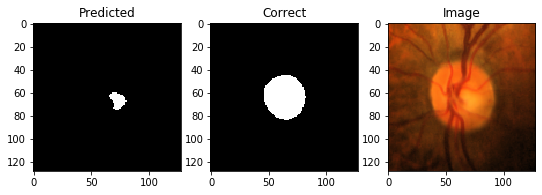

IOU: 0.1328413337469101
Dice: 0.23452768729641693
image #4


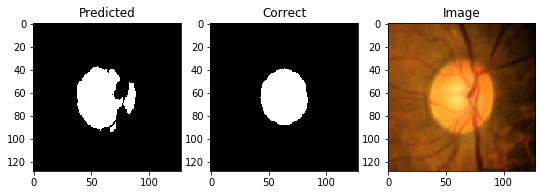

IOU: 0.6023110151290894
Dice: 0.7518028846153846
image #5


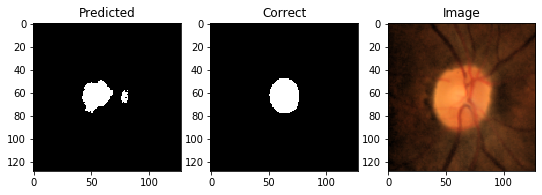

IOU: 0.32086166739463806
Dice: 0.4858369098712446
image #6


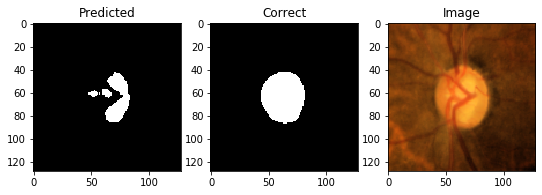

IOU: 0.3916133642196655
Dice: 0.5628192032686414
image #7


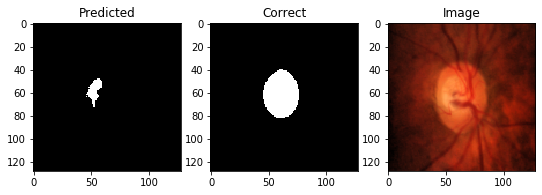

IOU: 0.16683316230773926
Dice: 0.285958904109589
image #8


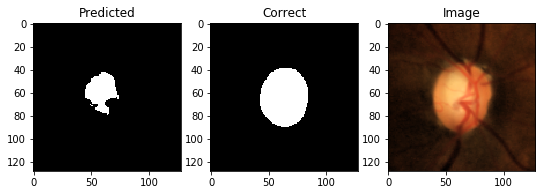

IOU: 0.3799999952316284
Dice: 0.5507246376811594
image #9


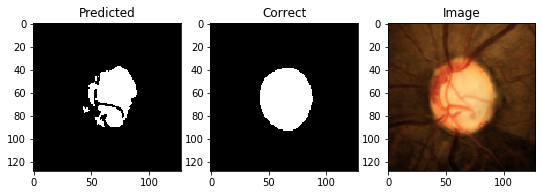

IOU: 0.6557863354682922
Dice: 0.7921146953405018
image #10


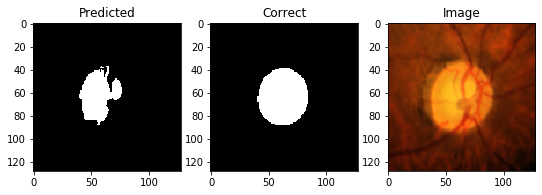

IOU: 0.5858756899833679
Dice: 0.738867117919487
image #11


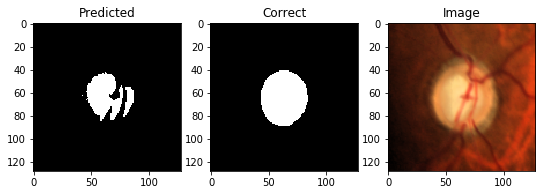

IOU: 0.5871617197990417
Dice: 0.7398889770023791
image #12


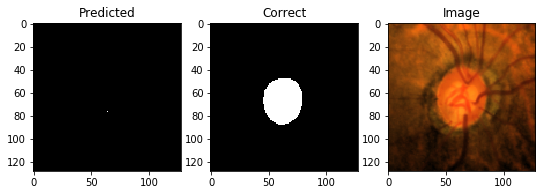

IOU: 0.0009199631749652326
Dice: 0.001838235294117647
image #13


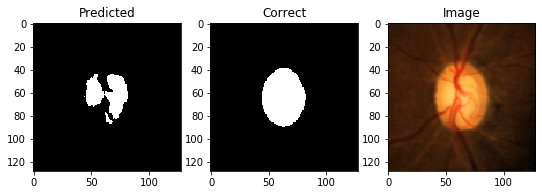

IOU: 0.551144003868103
Dice: 0.7106290672451193
image #14


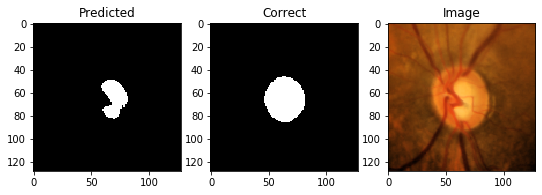

IOU: 0.466292142868042
Dice: 0.6360153256704981
image #15


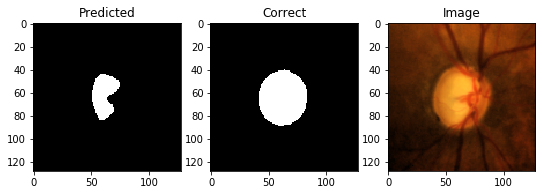

IOU: 0.39460477232933044
Dice: 0.565901934322987
image #16


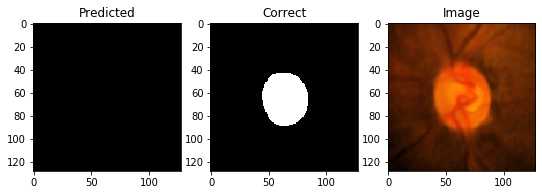

IOU: 0.0
Dice: 0.0
image #17


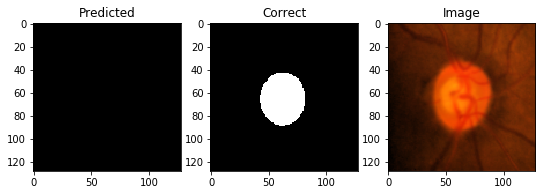

IOU: 0.0
Dice: 0.0
image #18


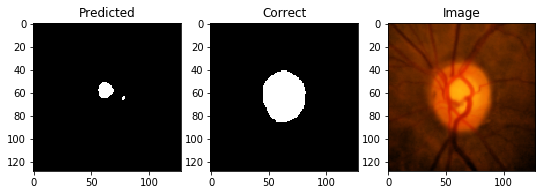

IOU: 0.11773818731307983
Dice: 0.21067221067221067
image #19


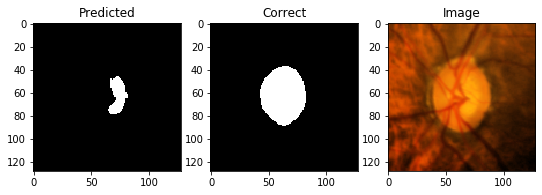

IOU: 0.22086285054683685
Dice: 0.3618143459915612
image #20


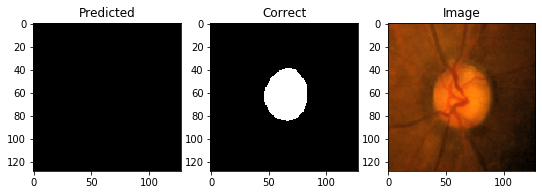

IOU: 0.0
Dice: 0.0
image #21


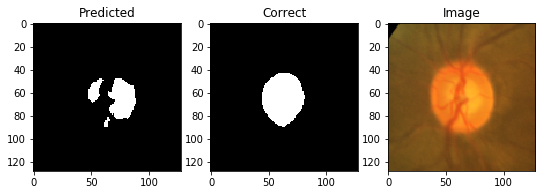

IOU: 0.36973685026168823
Dice: 0.5398655139289145
image #22


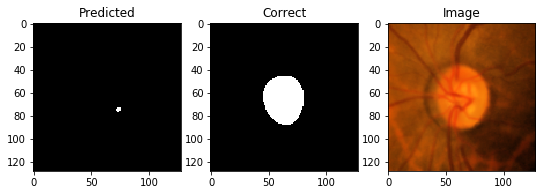

IOU: 0.010152284055948257
Dice: 0.020100502512562814
image #23


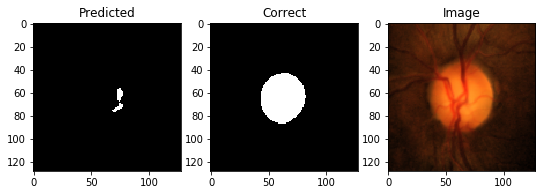

IOU: 0.05842185020446777
Dice: 0.11039426523297491
image #24


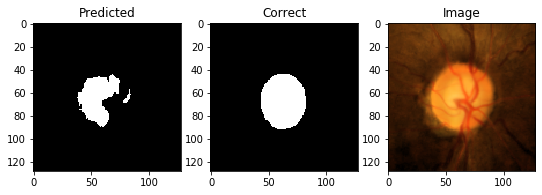

IOU: 0.538083553314209
Dice: 0.6996805111821086
image #25


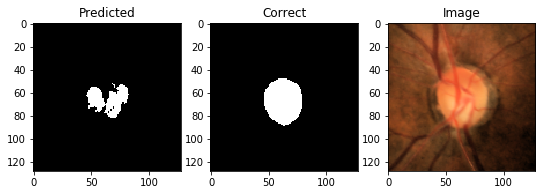

IOU: 0.5009140968322754
Dice: 0.6674786845310596
image #26


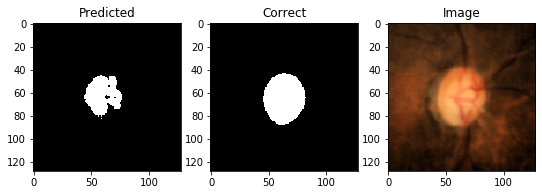

IOU: 0.5938485860824585
Dice: 0.7451756556160317
image #27


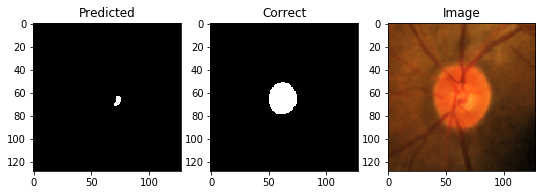

IOU: 0.0577281191945076
Dice: 0.10915492957746478
image #28


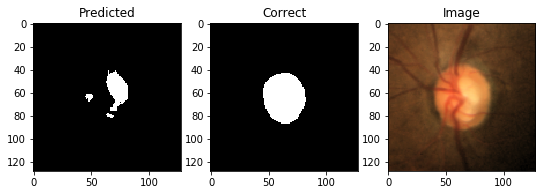

IOU: 0.3204633295536041
Dice: 0.4853801169590643
image #29


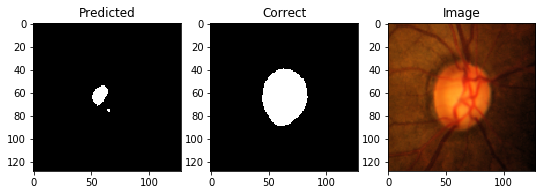

IOU: 0.11208643019199371
Dice: 0.201578627808136
image #30


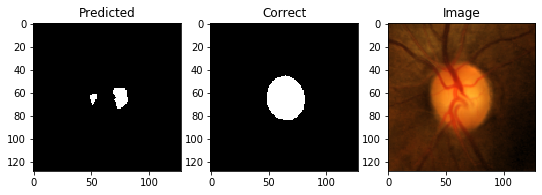

IOU: 0.21421422064304352
Dice: 0.3528441879637263
image #31


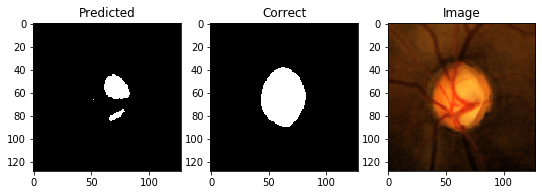

IOU: 0.2701452970504761
Dice: 0.4253770150806032
image #32


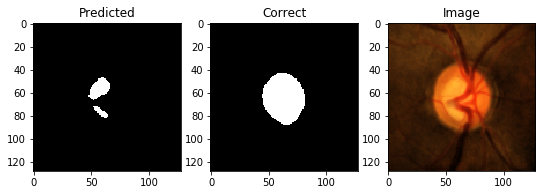

IOU: 0.23255814611911774
Dice: 0.37735849056603776
image #33


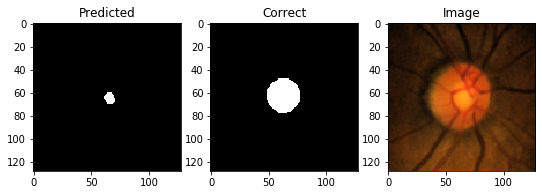

IOU: 0.10818713158369064
Dice: 0.19525065963060687
image #34


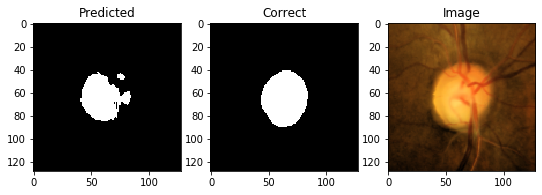

IOU: 0.639755368232727
Dice: 0.7803058560238717
image #35


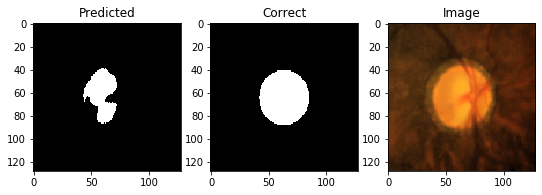

IOU: 0.5145807862281799
Dice: 0.6795026073004412
image #36


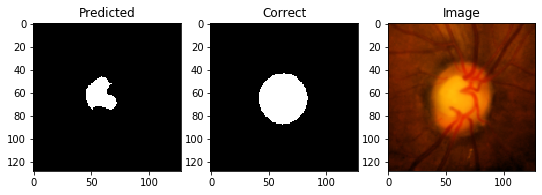

IOU: 0.35010337829589844
Dice: 0.518631955079122
image #37


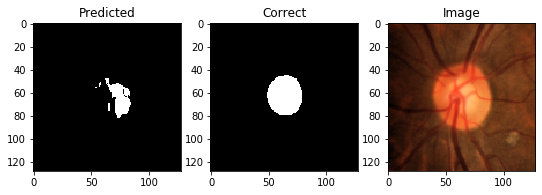

IOU: 0.2751539945602417
Dice: 0.43156199677938806
image #38


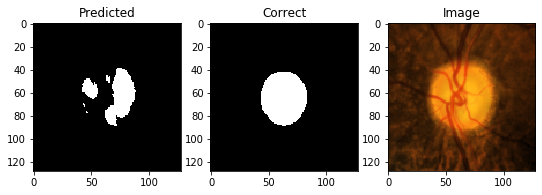

IOU: 0.40841013193130493
Dice: 0.5799591002044989
image #39


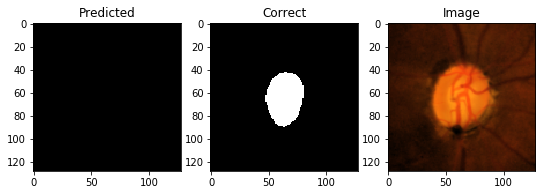

IOU: 0.0
Dice: 0.0
image #40


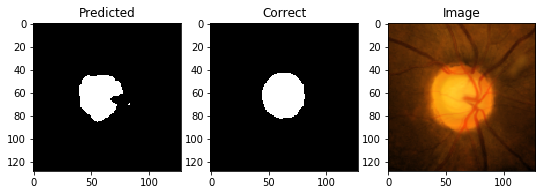

IOU: 0.6201991438865662
Dice: 0.7655838454784899
image #41


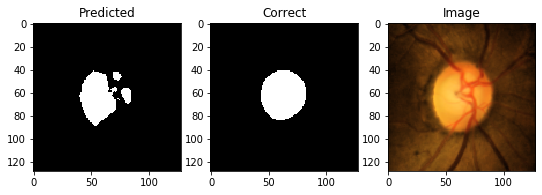

IOU: 0.60942542552948
Dice: 0.7573204973926996
image #42


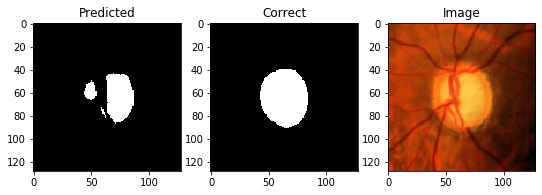

IOU: 0.5126146674156189
Dice: 0.6777862016679302
image #43


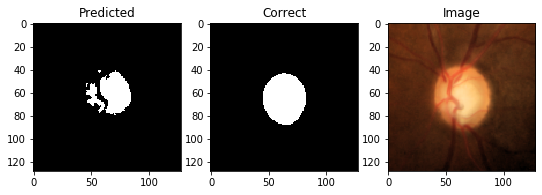

IOU: 0.5756698250770569
Dice: 0.7306985294117647
image #44


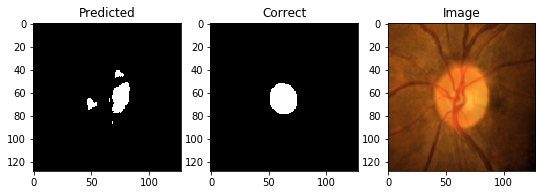

IOU: 0.15802781283855438
Dice: 0.27292576419213976
image #45


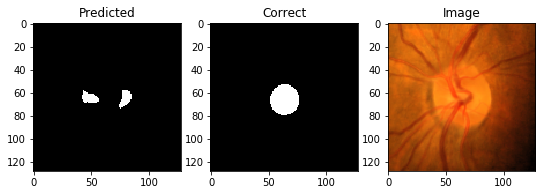

IOU: 0.054317548871040344
Dice: 0.10303830911492734
image #46


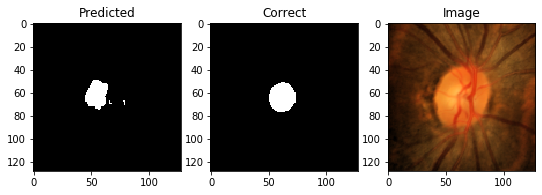

IOU: 0.38259440660476685
Dice: 0.5534441805225653
image #47


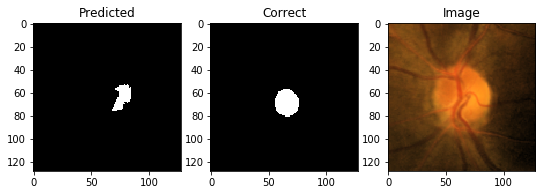

IOU: 0.1297297328710556
Dice: 0.22966507177033493
image #48


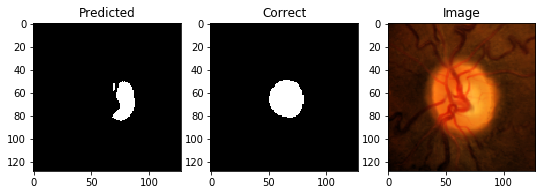

IOU: 0.19010668992996216
Dice: 0.31947840260798693
image #49


KeyboardInterrupt: 

In [21]:
pred_iou, pred_dice, pred_cup = predict(img_test, X_valid, Y_valid, model)
print(np.mean(pred_iou))
print(np.mean(pred_dice))

### Loading model

In [15]:
X_valid, Z_valid = next(data_generator(img_test, disc_test, disc_locations_test, train_or_test='test', batch_size=100, stationary=True))

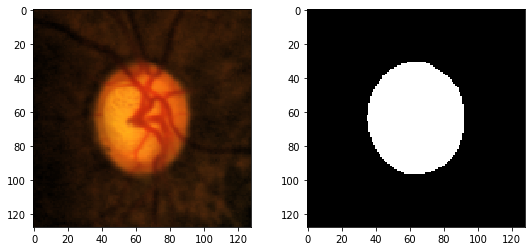

In [16]:
num = 1
for i in range(num):
    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_valid[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_valid[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [17]:
train(img_train, disc_train, disc_locations, 'disc_color', model, 700)

99/99 [==============================] - 32s 321ms/step - loss: 1.0059 - mean_IOU_gpu: 0.0035 - dice_metric: 0.0070


image #0


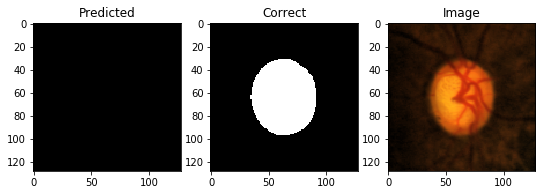

IOU: 0.0
Dice: 0.0
image #1


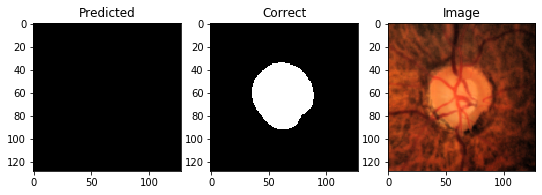

IOU: 0.0
Dice: 0.0
image #2


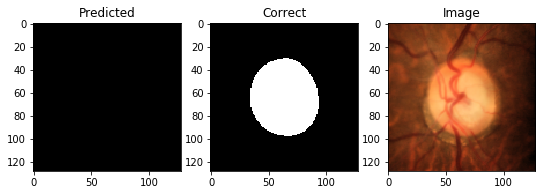

IOU: 0.0
Dice: 0.0
image #3


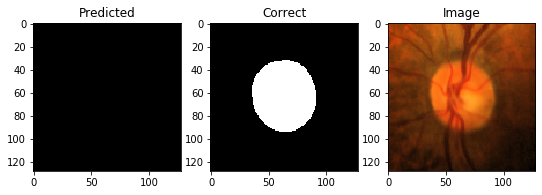

IOU: 0.0
Dice: 0.0
image #4


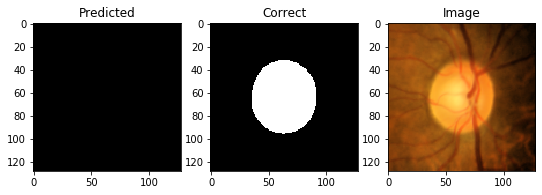

IOU: 0.0
Dice: 0.0
image #5


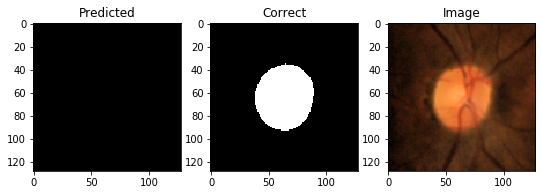

IOU: 0.0
Dice: 0.0
image #6


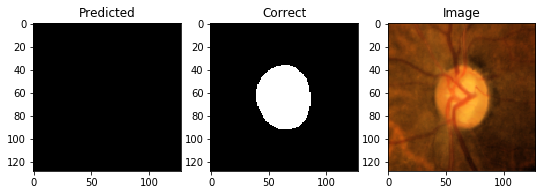

IOU: 0.0
Dice: 0.0
image #7


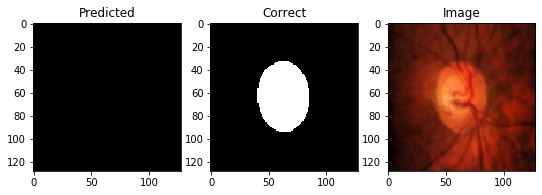

IOU: 0.0
Dice: 0.0
image #8


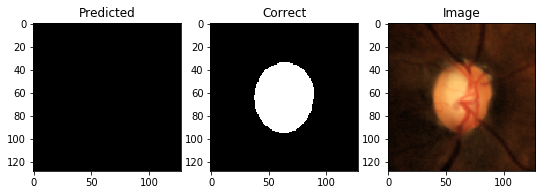

IOU: 0.0
Dice: 0.0
image #9


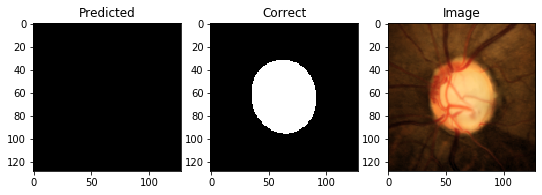

IOU: 0.0
Dice: 0.0
image #10


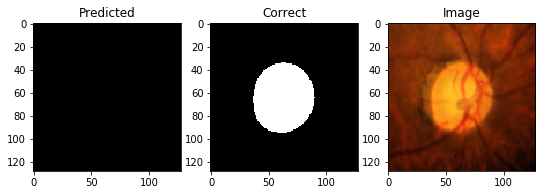

IOU: 0.0
Dice: 0.0
image #11


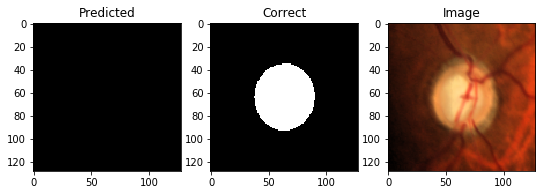

IOU: 0.0
Dice: 0.0
image #12


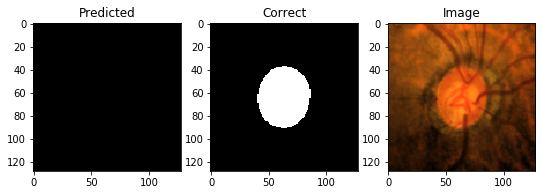

IOU: 0.0
Dice: 0.0
image #13


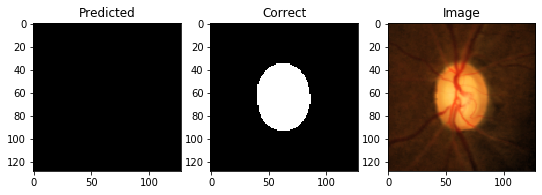

IOU: 0.0
Dice: 0.0
image #14


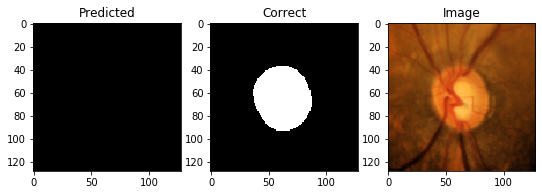

IOU: 0.0
Dice: 0.0
image #15


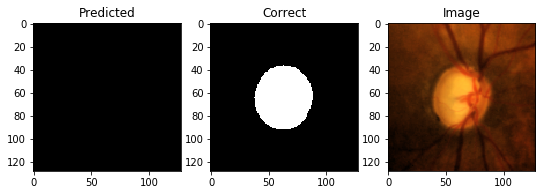

IOU: 0.0
Dice: 0.0
image #16


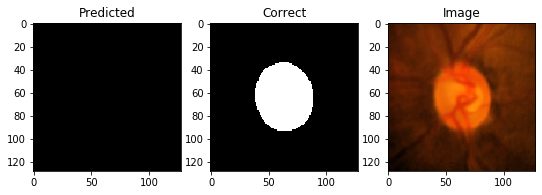

IOU: 0.0
Dice: 0.0
image #17


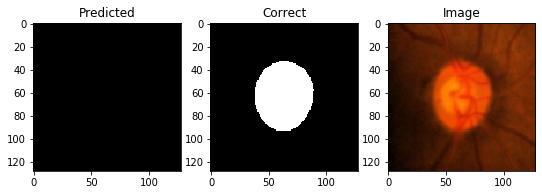

IOU: 0.0
Dice: 0.0
image #18


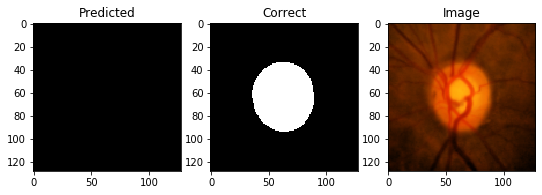

IOU: 0.0
Dice: 0.0
image #19


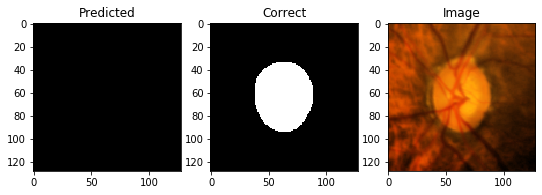

IOU: 0.0
Dice: 0.0
image #20


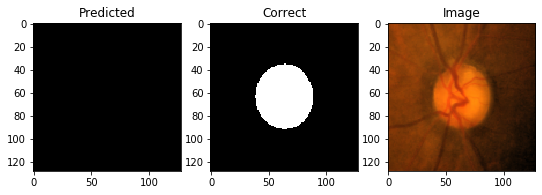

IOU: 0.0
Dice: 0.0
image #21


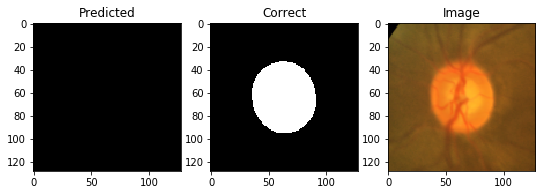

IOU: 0.0
Dice: 0.0
image #22


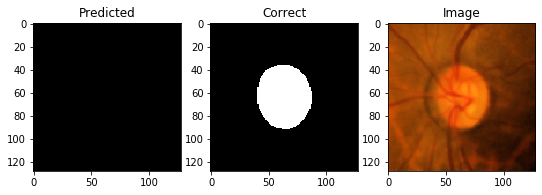

IOU: 0.0
Dice: 0.0
image #23


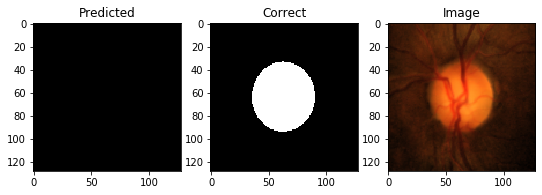

IOU: 0.0
Dice: 0.0
image #24


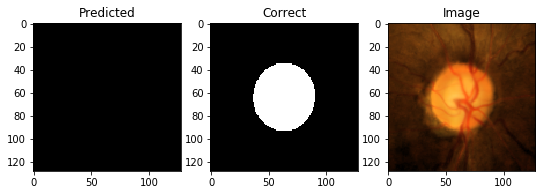

IOU: 0.0
Dice: 0.0
image #25


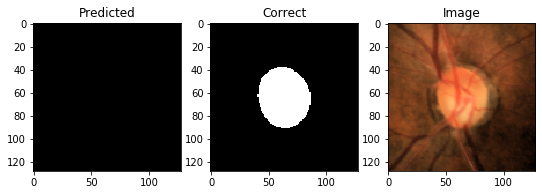

IOU: 0.0
Dice: 0.0
image #26


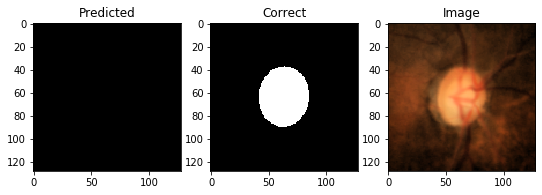

IOU: 0.0
Dice: 0.0
image #27


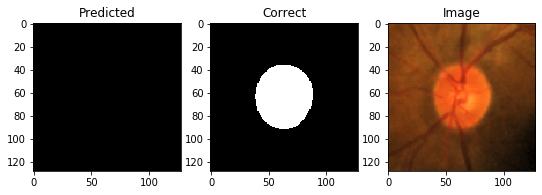

IOU: 0.0
Dice: 0.0
image #28


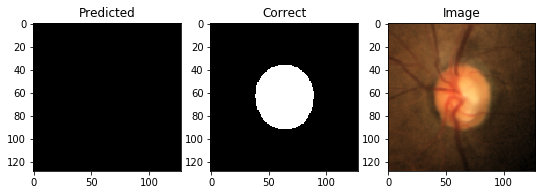

IOU: 0.0
Dice: 0.0
image #29


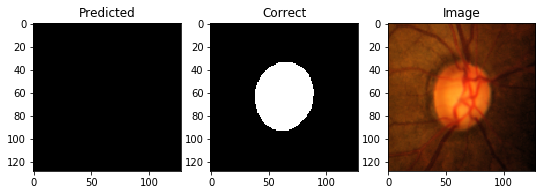

IOU: 0.0
Dice: 0.0
image #30


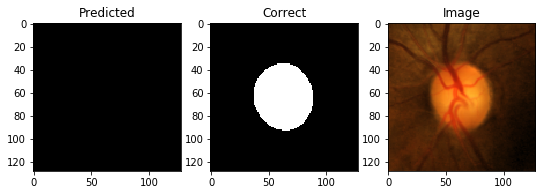

IOU: 0.0
Dice: 0.0
image #31


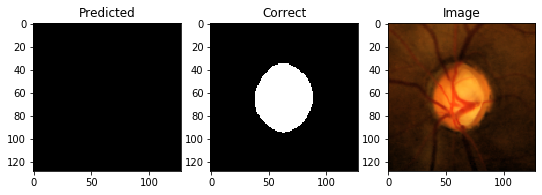

IOU: 0.0
Dice: 0.0
image #32


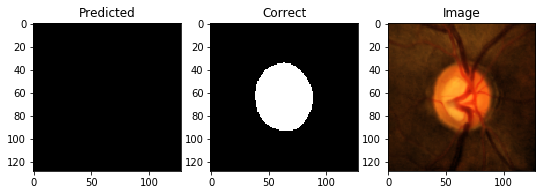

IOU: 0.0
Dice: 0.0
image #33


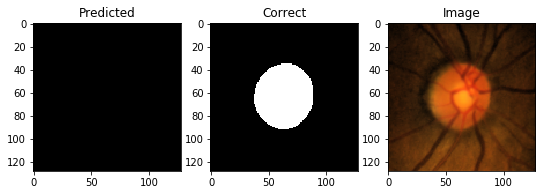

IOU: 0.0
Dice: 0.0
image #34


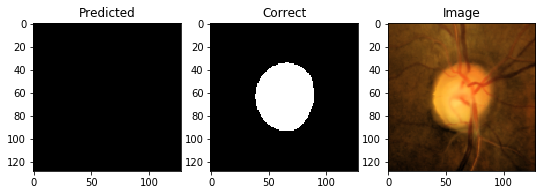

IOU: 0.0
Dice: 0.0
image #35


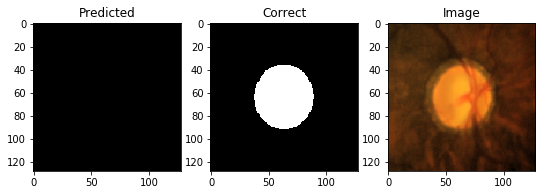

IOU: 0.0
Dice: 0.0
image #36


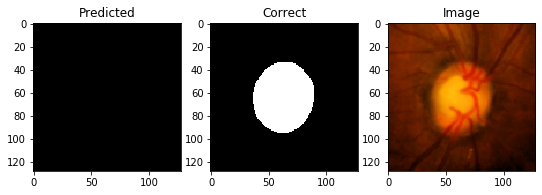

IOU: 0.0
Dice: 0.0
image #37


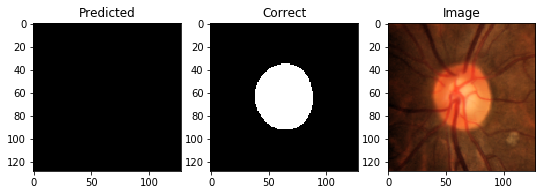

IOU: 0.0
Dice: 0.0
image #38


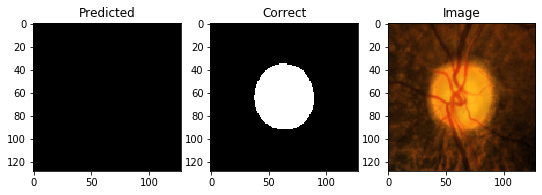

IOU: 0.0
Dice: 0.0
image #39


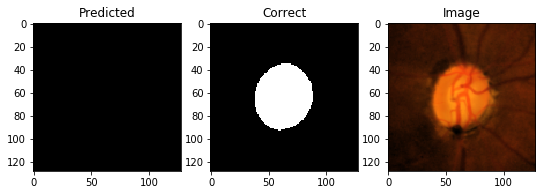

IOU: 0.0
Dice: 0.0
image #40


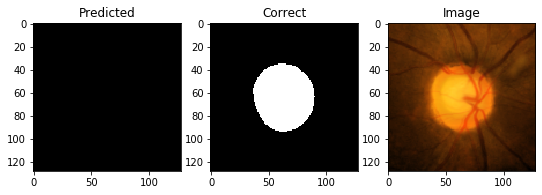

IOU: 0.0
Dice: 0.0
image #41


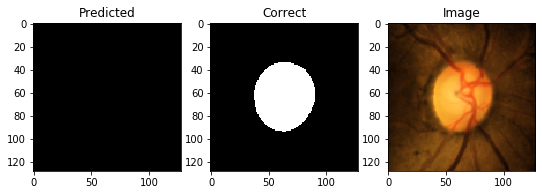

IOU: 0.0
Dice: 0.0
image #42


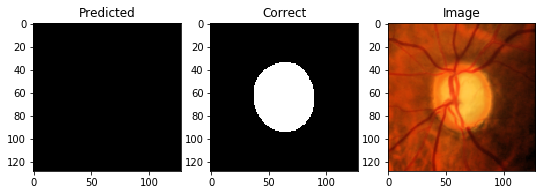

IOU: 0.0
Dice: 0.0
image #43


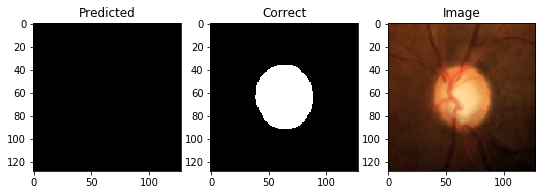

IOU: 0.0
Dice: 0.0
image #44


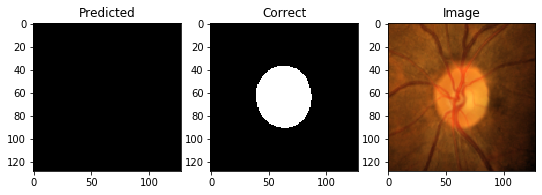

IOU: 0.0
Dice: 0.0
image #45


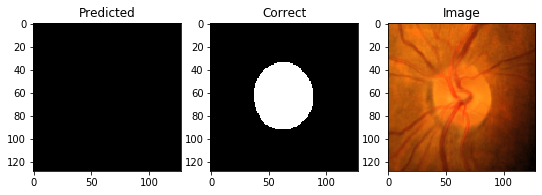

IOU: 0.0
Dice: 0.0
image #46


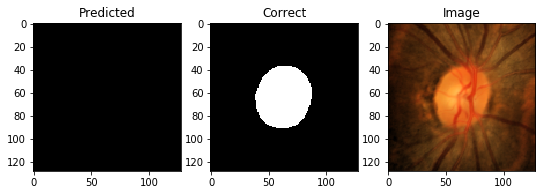

IOU: 0.0
Dice: 0.0
image #47


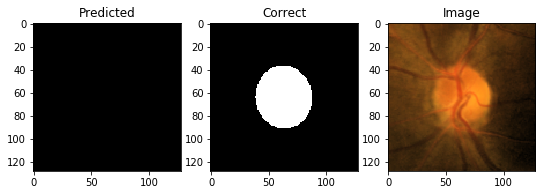

IOU: 0.0
Dice: 0.0
image #48


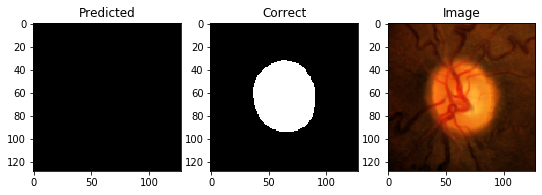

IOU: 0.0
Dice: 0.0
image #49


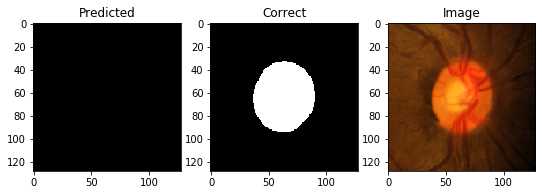

IOU: 0.0
Dice: 0.0
image #50


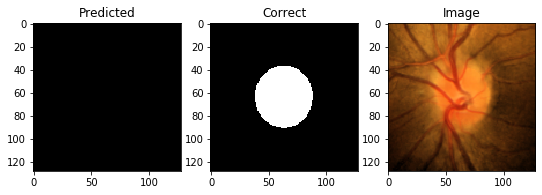

IOU: 0.0
Dice: 0.0
0.0
0.0


In [18]:
pred_iou, pred_dice, pred_disc = predict(img_test, X_valid, Z_valid, model)
print(np.mean(pred_iou))
print(np.mean(pred_dice))

In [39]:
cdrs = calculate_cdr(pred_cup, pred_disc)
areas = calculate_area(pred_cup, pred_disc)
print(areas)
d = {'cdr': cdrs, 'area': areas}
df = pd.DataFrame(data=d)
df


[]


Empty DataFrame
Columns: [cdr, area]
Index: []